# Behind the Mathematics of Music -- Fourier Analysis of Audio Spectra

Fourier analysis is a very popular tecnique when conducting different types of signal processing. In the scope of this project, Fourier analysis and specifically Fourier transforms can be applied to any type of sound signal which consists of frequencies being played at certain amplitudes throughout time. A specific frequency correlates to a specific tone we hear (if the frequency is in our audible range). Most sounds, noises, and songs are composed of changing frequencies throughout time. This makes these signals nonperiodic. A simple example is a sine wave that increases in frequency throughout time from 200Hz to 800Hz.

This projects focus is to use Fourier transforms to decompose musical notes, chords, and songs in time in order to return the signals frequency content information. Here we can analyze the frequency spectra, confirm the musical key of the signal being played, and to compare the spectral content of the same musical note played by different instruments. The latter is an exploration into musical timbre, or the spectral character of the sound.
When an instruments sounds, it causes molecules to vibrate at a certain frequency, resulting in the sound waves we hear. Because each instrument vibrates slightly differently, each produces a different timbre and the spectral content of different instruments signals, even if playing the exact same note, are different. Sound quality is essentially determined by the timbre of the instrument as that determines the number and prominence of the overtones, or integer multiples of the fundamental frequency, which are produced [5]. 

For this project I first recorded musical signals from different instrumets and brought them all into Python. These signals are discrete in the sense that the amplitude data is recorded at equally spaced time intervals. Therefore the Discrete Fourier Transform will be used decompose these signals. 

Below is the math that makes up Fourier transforms. The notation here can be found in reference [1] and also in Professor Ritz's Lecture 13 notebook.

Recall that the Fourier transform of a one-dimensional spatial function of time, $y(t)$, is

$$ Y(\omega)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} dt \: e^{-i\omega t}y(t) $$

where $f$ is the frequency of the Fourier component and $\omega=2\pi f$. The inverse transform is

$$ y(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} d\omega \: e^{i\omega t}Y(\omega) $$

The Fourier transform, $Y(\omega)$, provides the ability to analyze the Fourier components. 

Discretizing with time index $k$, such that $t_k=kh$ with $h=\Delta t$, we have:

$$y_k\equiv y(t_k)$$


The Discrete Fourier Transform (DFT) algorithm comprises both the series and the transform as the same. When the transform integral is approximated as a finite sum, it becomes equivalent to the Fourier series [1]. The Fourier integral is evaluated from time 0 to T over which the signal is measured, and the trapezoid rule is used for the package's integration process.


Replace the $\pm\infty$

$$ Y(\omega_n)\approx \frac{1}{\sqrt{2\pi}}\int_{0}^{T} dt \: e^{-i\omega_n t}y(t) $$

and the integrals are discrete trapezoid rule sums

$$\approx \frac{1}{\sqrt{2\pi}}\sum_{k=1}^N hy(t_k) \: e^{-i\omega_n t_k}$$

Defining $Y_n\equiv \frac{1}{h}Y(\omega_n)$ and substituting for $\omega_n$, 

$${Y_n=\sum_{k=1}^N \frac{1}{\sqrt{2\pi}}y_k \: e^{-2\pi ikn/N} \:\: n=0,1,2,..N}$$

and, as $d\omega\approx\frac{2\pi}{Nh}$, the inverse is

$${y(t)\approx\sum_{n=1}^N \frac{2\pi}{N}\frac{1}{\sqrt{2\pi}} \: e^{i\omega_nt}Y_n \:\: n=0,1,2,..N}$$

More concisely, and symmetrically,

$$\boxed{y_k=\frac{\sqrt{2\pi}}{N}\sum_{n=1}^{N}Z^{-nk}Y_n,\:\:\: Z=e^{-2\pi i/N}}$$

$$\boxed{Y_n=\frac{1}{\sqrt{2\pi}}\sum_{k=1}^{N}Z^{nk}y_k,\:\:\: Z^{nk}\equiv \left [ (Z)^n\right ]^k}$$

The computer now only needs to compute powers of $Z$, and we can easily plot the strength of the frequency components relative to one another [1].

 If the input signal is periodic, the DFT is a great way to obtain a Fourier Series and decompose the signal into its frequency components. If the signal is not periodic, we note that the DFT might be a bad approximation near the endpoints of the time interval, but should give an accurate decomposition for the bulk of the signal [1]. 
As we increase the samples length there are  multiplications and additions of complex numbers to be computed which reduces computational time. To speed up the calculations, the popular Fast Fourier Transform (FFT) algorithm was created in 1965 by Cooley and Tukey. It is essentially the same algorithm as the DFT but exploits symmetric properties in the data and reduces the computational time to  by dividing the data into two equal groups and transforming only one group, and continuing this process until all the data is transformed [2]. This project will be utilizing canned FFT algorithms, specifically scipy's fftpack [2].

In many cases $Y_n$ is a complex funciton with both positive and negative values. Accordingly, a power spectrum plot ($|Y(\omega)|^2$ vs. $\omega$) is a nice way to visualize the complex signal as it shows the amount of power of each frequency component in the signal. 


Below is an image that shows the frequencies of all the different musical notes [3]. This will be my comparison guide as I analyze different sounds. 

<img src="musicnotechart.png" width="50%">

So if I play a single G4 note on the piano, a power spectrum plot of the signals frequency distribution should confirm that the resulting fundamental tone is around 391.2 Hz, with possibly present overtones of lesser amplitude in the same key (if I play the instrument correctly). If I play a chord consisting of different notes, primary frequency peaks should be visible for each of the notes in the chord.

Lets see this all in action...


In [3]:
##Firstly, import all the relevant packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from numpy import *  
from scipy.io import wavfile  #scipy package to read wav files
from scipy.fftpack import fft #scipy fourier transform package
import sys

print(sys.version)

3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]


Text(0.5, 1.0, 'Full Frequency Distribution of Signal')

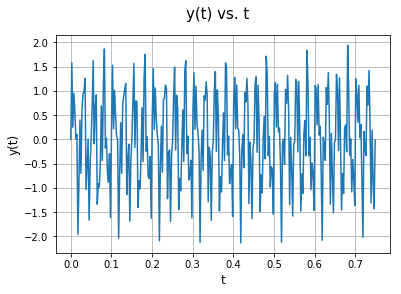

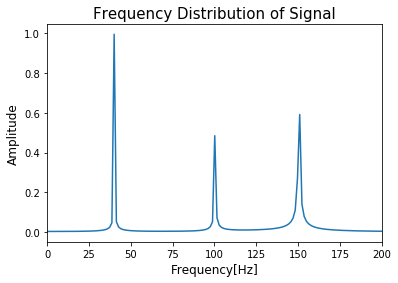

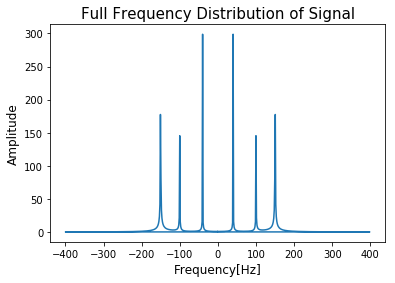

In [4]:
##exploring scipy.fftpack.fft on a test funciton
from scipy.fftpack import fftfreq

T = 1 / 800  #sample spacing
f_s = 600    #number samplepoints
t = np.linspace(0,T*f_s,f_s)
y = np.sin(40*2*np.pi*t) + .5*np.sin(100*2*np.pi*t) + .7*np.sin(150*2*np.pi*t)

fig = plt.figure()
ax=fig.gca()
ax.grid(True)
fig.suptitle('y(t) vs. t',fontsize=15)
plt.plot(t[::2], y[::2])
plt.ylabel('y(t)',size=12)
plt.xlabel('t',size=12)



F = fft(y)      #scipy's FFT

freq = np.linspace(0,1/T,f_s)  #frequency = 1/T
fig = plt.figure()
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.ylabel('Amplitude', size=12)
plt.xlabel('Frequency[Hz]',size=12)
plt.plot(freq[:len(t)//2],np.abs(F)[:len(t)//2]*2/len(t))
plt.xlim(0,200)

xf = fftfreq(f_s, T)  #utilizing fftfreq to obtain the frequency axis. fftfreq returns the FFT sample frequency points.
fig = plt.figure()
plt.plot(xf, np.abs(F))
plt.ylabel('Amplitude', size=12)
plt.xlabel('Frequency[Hz]',size=12)
plt.title('Full Frequency Distribution of Signal',fontsize=15)



Great. We can clearly see the three frequency peaks at 40, 100, and 150 Hz as inputted. Notice that the full spectrum also includes frequency peaks at these same magnitudes but in the negative range. This is beacuse FFT returns both the Fourier coefficients for negative and positive frequencies. We can plot only the positive or negative frequencies if desired, as done below.

Text(0.5, 1.0, 'Full Frequency Distribution of Signal')

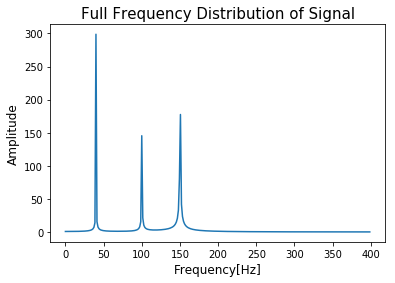

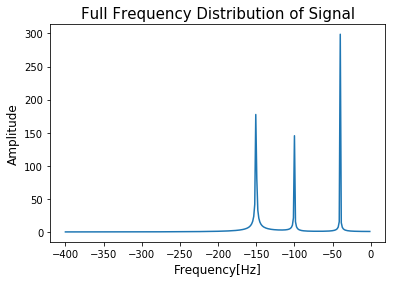

In [4]:

fig = plt.figure()
plt.plot(xf[:int(len(t)/2)], np.abs(F[:int(len(t)/2)]))  #slicing the indices to plot only positive values
plt.ylabel('Amplitude', size=12)
plt.xlabel('Frequency[Hz]',size=12)
plt.title('Full Frequency Distribution of Signal',fontsize=15)


fig = plt.figure()
plt.plot(xf[int(len(t)/2):], np.abs(F[int(len(t)/2):]))  #slicing the indices to plot only negative values
plt.ylabel('Amplitude', size=12)
plt.xlabel('Frequency[Hz]',size=12)
plt.title('Full Frequency Distribution of Signal',fontsize=15)






Great. Lets now continue and decompose different audio signals which I have recorded.

In [5]:
#All the wav audio files I will be exploring

sound_list = []
sound_list_more = []                    
jazzguitar_C5 = 'jazzguitar_C5.wav'        # Audio Files
jazzguitar_E3 = 'jazzguitar_E3.wav'
brasshorn_C5 = 'brasshorn_C5.wav'
celesta_G5 = 'celesta_G5.wav'
jazzguitarchord_Cmaj = 'jazzguitarchord_Cmaj.wav'
decendingcelesta = 'decendingcelesta_Cmaj.wav'  
eastflute_C5 = 'eastflute_C5.wav'
eastflutechord_Cmaj = 'eastflutechord_Cmaj.wav'
frenchhornchord_Fmin = 'frenchhorn_5notechord_Fmin.wav'
pianonote_C4 = 'pianonote_C4.wav'
pianonote_C5 = 'pianonote_C5.wav'
violin_C4 = 'violin_C4.wav'
acousticguitarnote ='acousticguitarnote_.wav'
acousticguitarchord_Gmaj = 'acousticguitarchord_Gmaj.wav'
ukulelenote = 'ukulele_.wav'
sinwave = 'computergen_sinwave.wav'

sound_list.extend((jazzguitar_C5,brasshorn_C5,celesta_G5,eastflute_C5,pianonote_C4,violin_C4,pianonote_C5,eastflutechord_Cmaj,acousticguitarnote,sinwave))

#had to create another sound list to make my function below run properly in order to analyze these samples
sound_list_more.extend((ukulelenote,decendingcelesta,jazzguitarchord_Cmaj,acousticguitarchord_Gmaj))


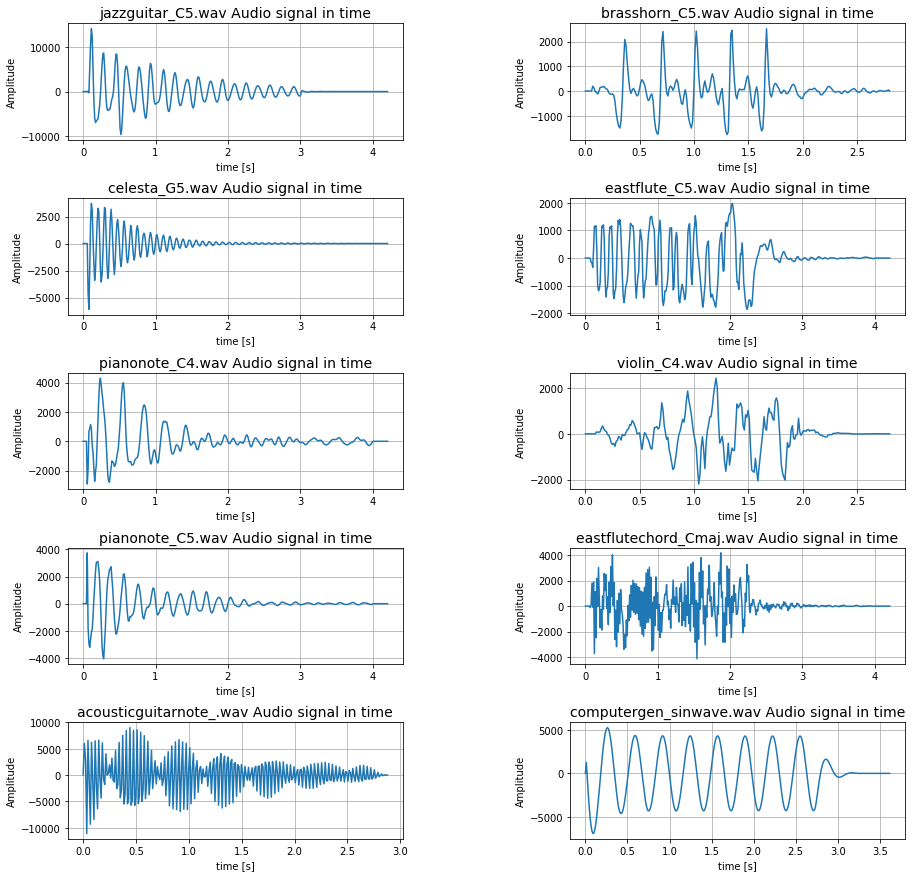

In [33]:
#Using wavfile.read from scipy to gather audio spectra data over time
#Will do this for all the sounds in sound_list and make a group plot

fig = plt.figure()
fig.subplots_adjust(hspace=.5, wspace=.5)
fig.set_size_inches(15,15)


for s,i in zip(sound_list,range(1,len(sound_list)+1)):
    samplerate, Audiodata = wavfile.read(s)
    #print(len(Audiodata),samplerate)
    length = Audiodata.shape[0] / samplerate
    time = np.linspace(0., length, Audiodata.shape[0])
    # Plot the audio signal in time
    ax = fig.add_subplot(5,2,i)
    ax=fig.gca()
    ax.grid(True)
    plt.title('%s Audio signal in time'%(s),size=14)
    plt.xlabel('time [s]')
    plt.ylabel('Amplitude')
    plt.plot(time[::500], Audiodata[::500])  #plotting every 500 points. plotting all of the points 
                                             #creates too dense of a signal to interpret
                                             #each signal consists of around 150,000 data points as given by len(Audiodata)

Before I continue with the Fourier analysis of these signals, I'd like to interpret the differences and how they compare, considering many of them are playing the same fundamental harmonic frequency. Like mentioned in the introduction, each instrument vibrates the air molecules in different ways and thus creates unique sound waves with different timbre. The guitar, a chordophone, produces standing waves when the the strings are plucked. Aerophones like the trumpet produce standing waves within the air columns of the instrument. The piano is interestingly consitered a percussion (and also string) instrument because the vibrations are initiated by soft hammers hitting strings of different lengths, creating notes with different frequencies. 


The trumpet signal above shows a clear combination of many frequencies that make the waveform. It is to note that a small portion of the total power is in the fundamental C note [4]. The first handful of overtones or higher modes of vibration are very much present in brass instruments like the trumpet and this should be seen in the frequency distribution plots below.

We can also see harmonic overtones present in the piano signal but can definetally tell that the signal is primarily dominated by the fundamental frequency and looks more like a simple combination of sine/cosine functions as this sound has a much more simple timbre.

With the violin we can again see more dominance of the fundamental frequency with a constant waveform period. Noise tends to be included from the bow on the string and can result in sudden deconstructive interferences in the waveform. 

As expected, the most complicated signal is the flute chord because it consists of multiple harmonic freqencies being played along with overtones from each harmonic. This creates the dense signal we see, essentially made from a large number of function with different frequencies. The single flute note however contains few overtones especially for lower notes. This is why low notes on the flute can sound dry and melancholy.

The celesta (a bell instrument) and the guitar produce a more pure sinusoidal signal. Both instruments weigh hevaily on the fundamental frequency and have minimal overtone frequencies. 

We can also see, as expected, that the computer generated sine wave has the most sinusoidal signal out of all the instruments. What is being played here is just a sine wave of a single frequency. There should be no overtones present in this sample. 


The effects of distortion and overdrive filters, used often with guitars, is interesting to note here because it basically consists of clipping the signal at a certain amplitude level and adjusting the levels of the signal within. Audio manipulation like this can create a more harsh sound that many musicians desire. 

loudest frequency  for jazzguitar_C5.wav sample is: 523.1962 Hz
loudest frequency  for brasshorn_C5.wav sample is: 522.9601 Hz
loudest frequency  for celesta_G5.wav sample is: 782.7756 Hz
loudest frequency  for eastflute_C5.wav sample is: 527.2336 Hz
loudest frequency  for pianonote_C4.wav sample is: 261.2419 Hz
loudest frequency  for violin_C4.wav sample is: 260.7676 Hz


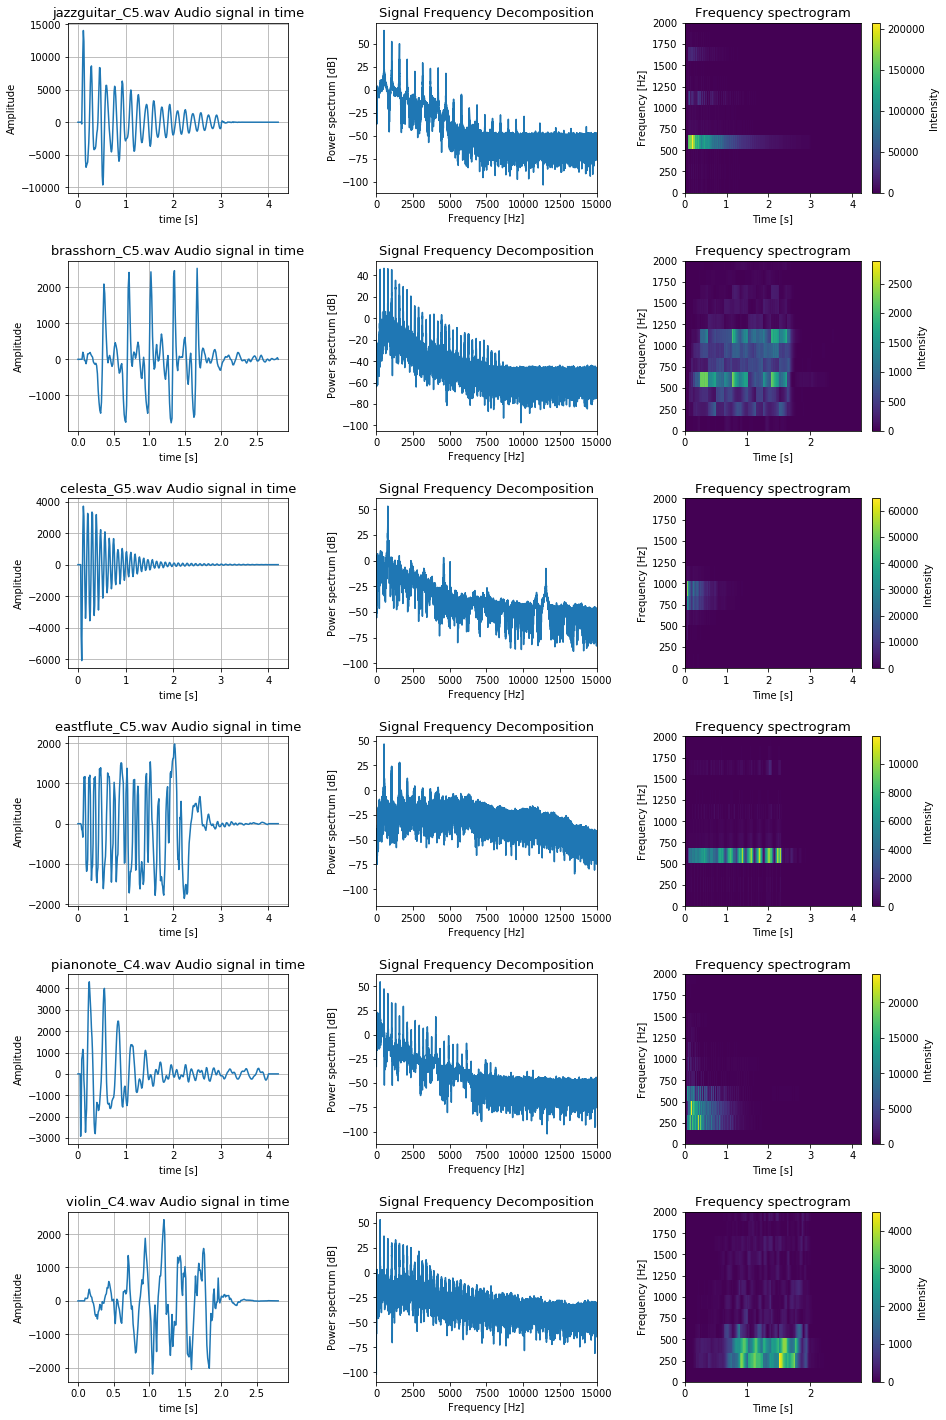

In [34]:
#processing 6 of the audio files and making plots

from scipy.fftpack import fft  
from scipy import signal   #spectrogram

fig = plt.figure()
fig.subplots_adjust(hspace=.4, wspace=.4)
fig.set_size_inches(15,25)
   
i = 1           #iterator value used to make the multiple plot scheme below
listkeeps = 6
num = 0         #value used to iterate through the list of audio files in the function below

def audiodata_processing(sl):
    """Returns the data from wavfile.read and FFT conducted on the the list of audio files 
    """
    samplerate, Audiodata = wavfile.read(sl[num])   #gathering wavfile data
    AudioFreq = fft(Audiodata)                      #performing FFT on the audio data
    return [samplerate, (Audiodata), (AudioFreq)]
    
#print(audiodata(sound_list)[0])
#print(audiodata(sound_list)[1])
#print(audiodata(sound_list)[2])

for s,name in zip(range(0,listkeeps),sound_list):
    adata = audiodata_processing(sound_list)
    length = len(adata[1]) / adata[0]
    time = np.linspace(0., length, len(adata[1]))
    n = len(adata[1] / 2) 
    adata[2] = adata[2][0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
    MagFreq = np.abs(np.array(adata[2])) # Magnitude
    MagFreq = MagFreq / float(n)
    # power spectrum
    MagFreq = MagFreq**2
    if n % 2 > 0: #fft odd 
        MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
    else:         #fft even
        MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

    freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (adata[0] / n)
    #print(len(freqAxis))
    
    ##Plots
    ax = fig.add_subplot(listkeeps,3,i)                 #audio spectra plot
    ax=fig.gca()
    ax.grid(True)
    plt.title('%s Audio signal in time'%(name),size=13)
    plt.xlabel('time [s]'); plt.ylabel('Amplitude');
    plt.plot(time[::500], adata[1][::500]) 
    i += 1
    
    ax = fig.add_subplot(listkeeps,3,i)                 #signal frequency decomposition plot
    plt.plot(freqAxis, 10*np.log10(MagFreq)) #Power spectrum
    plt.title('Signal Frequency Decomposition',size=13)
    plt.xlabel('Frequency [Hz]'); plt.ylabel('Power spectrum [dB]');
    plt.xlim(0,15000)
    i += 1
    
    ax = fig.add_subplot(listkeeps,3,i)                 #visual spectogram plot
    f, t, Sxx = signal.spectrogram(adata[1], adata[0])
    #plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
    plt.pcolormesh(t, f,Sxx) # Linear spectrogram
    plt.xlabel('Time [s]'); plt.ylabel('Frequency [Hz]')
    plt.title('Frequency spectrogram',size=13)
    plt.ylim(0,2000)
    plt.colorbar().set_label('Intensity')
    i += 1
    

    largest_value_indice = np.argmax(MagFreq)
    #print(largest_value_indice)
    print('loudest frequency  for %s sample is: %.4f Hz' %(name,freqAxis[largest_value_indice]))
    
    num += 1    #iterate through the list of different sounds
    
    

loudest frequency in jazzguitar_C5.wav is: 523.1962 Hz
loudest frequency in brasshorn_C5.wav is: 522.9601 Hz
loudest frequency in celesta_G5.wav is: 782.7756 Hz
loudest frequency in eastflute_C5.wav is: 527.2336 Hz
loudest frequency in pianonote_C4.wav is: 261.2419 Hz
loudest frequency in violin_C4.wav is: 260.7676 Hz


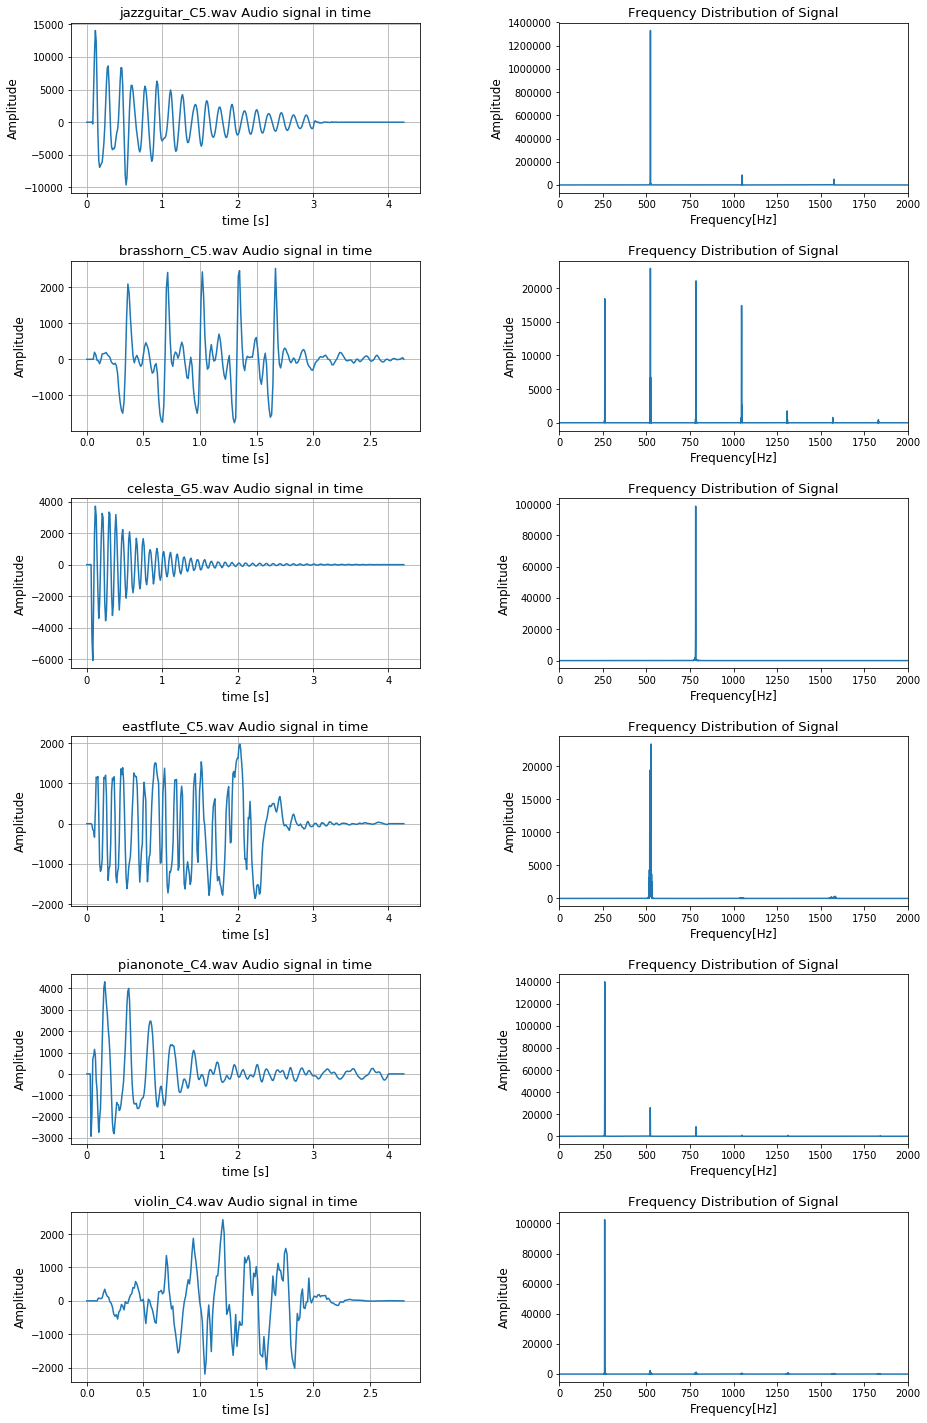

In [35]:
#more clear frequency spectra plots

fig = plt.figure()
fig.subplots_adjust(hspace=.4, wspace=.4)
fig.set_size_inches(15,25)
   
i = 1           #iterator value used to make the multiple plot scheme below
listkeeps = 6
num = 0         #value used to iterate through the list of audio files in the function below


for s,name in zip(range(0,listkeeps),sound_list):
    adata = audiodata_processing(sound_list)
    length = len(adata[1]) / adata[0]
    time = np.linspace(0., length, len(adata[1]))
    n = len(adata[1]) 
    adata[2] = adata[2][0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
    MagFreq = np.abs(adata[2]) #Magnitude
    MagFreq = MagFreq / float(n)
    #power spectrum
    MagFreq = MagFreq**2
    
    t = np.linspace(0,.1,500)
    T = t[1] - t[0] #total sampling interval
    N = len(adata[1])
    
    #frequency = 1/T
    f = np.linspace(0,1000,N)
    
    
    freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (adata[0] / n)
    
    ##Plots
    ax = fig.add_subplot(listkeeps,2,i)         #audio spectra plot
    ax=fig.gca()
    ax.grid(True)
    plt.title('%s Audio signal in time'%(name),size=13)
    plt.xlabel('time [s]',fontsize=12); plt.ylabel('Amplitude',fontsize=12);
    plt.plot(time[::500], adata[1][::500]) 
    i += 1
    
    ax = fig.add_subplot(listkeeps,2,i)         #frequency distribution plot
    plt.ylabel('Amplitude',fontsize=12); plt.xlabel('Frequency[Hz]',fontsize=12)
    plt.title('Frequency Distribution of Signal',fontsize=13)
    plt.plot(freqAxis, MagFreq) #Power spectrum
    #plt.scatter(freqAxis[int(1046*n / samplerate )],MagFreq[int(1046*n / samplerate )])
    plt.xlim(0,2000)
    i += 1

    largest_value_indice = np.argmax(MagFreq)
    print('loudest frequency in %s is: %.4f Hz' %(name,freqAxis[largest_value_indice]))

    num += 1

Both the frequency spectrogram and the frequency plots above provide some nice insight into the frequencies that makeup these sounds. 

It can be seen that the brass horn note has the most overtones. There are multiple frequencies that dominate this signal even though only the C5 note is being played. We see that the celesta and the guitar notes are both dominated by their fundamental frequency and contain minimal overtone frequencies. 

Let's check out a couple specific sounds...

Sample length = 4.2107 seconds
loudest frequency in pianonote_C4.wav is: 261.2419 Hz


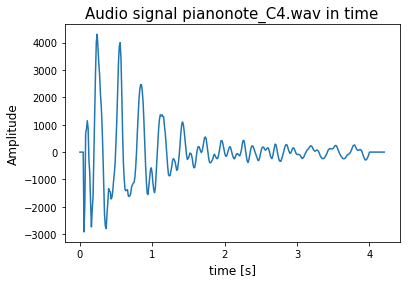

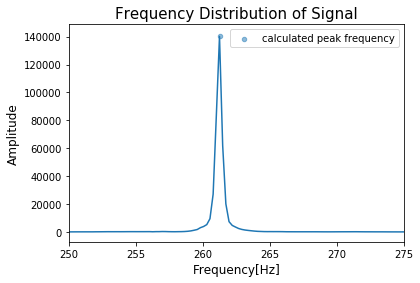

In [36]:
##Zooming in / exploring the pianonote_C3 frequency spectra

num = 4

adata = audiodata_processing(sound_list)
length = len(adata[1]) / adata[0]
print("Sample length = %.4f seconds" %length)


# Plot the audio signal in time
fig = plt.figure(1)
time = np.linspace(0., length, len(adata[1]))
plt.title('Audio signal %s in time' %(sound_list[num]),size=15)
#plt.xlim([0,1.5])
plt.xlabel('time [s]',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(time[::500], adata[1][::500])


n = len(adata[1])
adata2 = adata[2][0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(adata2) #Magnitude
MagFreq = MagFreq / float(n)
#power spectrum
MagFreq = MagFreq**2

t = np.linspace(0,.1,500)
T = t[1] - t[0]   #total sampling interval
N = len(adata[1])

freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (adata[0] / n);

#Plotting the range of the frequency peak around 661 Hz
freqlow = 250
freqhigh = 275
largest_value_indice = np.argmax(MagFreq)
loudest_freq = freqAxis[largest_value_indice]


fig = plt.figure(2)
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) 
plt.scatter(freqAxis[int(loudest_freq*n / adata[0] )],MagFreq[int(loudest_freq*n / adata[0] )],alpha=.5,s=20,label='calculated peak frequency')
plt.xlim(freqlow,freqhigh)
plt.legend()
print('loudest frequency in %s is: %.4f Hz' %(sound_list[num],loudest_freq))

indicelow = freqlow*n/adata[0]; indicehigh = freqhigh*n/adata[0]


/usr/local/anaconda3-2018/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'time [s]')

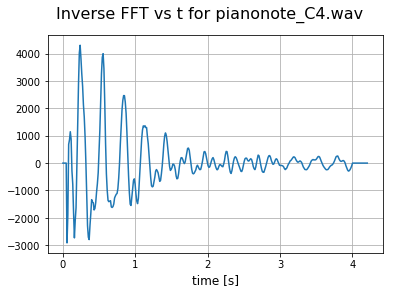

In [37]:
#Inverse FFT
from scipy.fftpack import ifft
time = np.linspace(0., length, len(adata[1]))
yinv=ifft(adata[2])
fig = plt.figure()
ax=fig.gca()
ax.grid(True)
fig.suptitle('Inverse FFT vs t for %s'%(sound_list[num]), fontsize=16)
plt.plot(time[::500],yinv[::500])
ax.set_xlabel('time [s]', size=12) 

Great. Using the inverse fast fourier transform gave us back the same audio signal which I originally plotted. We also found that the peak frequency in the sample is at 261.24 Hz. From the chart figure, the frequency of this C4 note should be 261.63 Hz. Our calcualted value using the FFT decomposition confirms the expected frequency of this piano note. 

Sample length = 4.2107 seconds
loudest frequency in jazzguitarchord_Cmaj.wav is: 329.8772 Hz


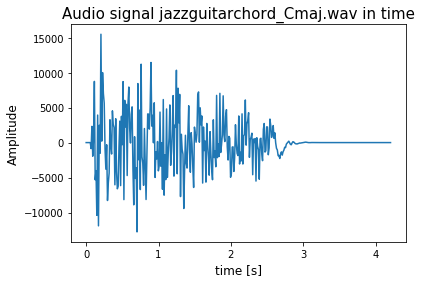

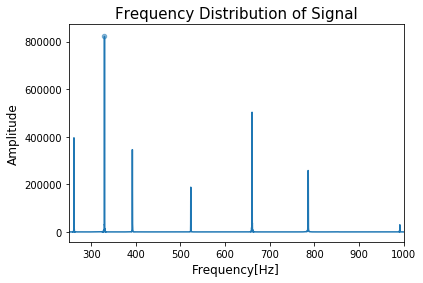

In [40]:
##Exploring the electronic guitar chord sample

num = 2  #list indice of guitarchord sample in sound_list_more

adata = audiodata_processing(sound_list_more)
length = len(adata[1]) / adata[0]
print("Sample length = %.4f seconds" %length)


# Plot the audio signal in time
fig = plt.figure(1)
time = np.linspace(0., length, len(adata[1]))
plt.title('Audio signal %s in time' %(sound_list_more[num]),size=15)
#plt.xlim([0,1.5])
plt.xlabel('time [s]',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(time[::500], adata[1][::500])


n = len(adata[1])
adata2 = adata[2][0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(adata2) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2

t = np.linspace(0,.1,500)
T = t[1] - t[0] #total sampling interval
N = len(adata[1])

    
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (adata[0] / n);

freqlow = 250
freqhigh = 1000

largest_value_indice = np.argmax(MagFreq)
loudest_freq = freqAxis[largest_value_indice]

#plot the frequency distribution of the signal
fig = plt.figure(2)
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq)   #Power spectrum
plt.scatter(freqAxis[int(loudest_freq*n / adata[0] )],MagFreq[int(loudest_freq*n / adata[0] )],alpha=.5,s=20,label='calculated peak frequency')
plt.xlim(freqlow,freqhigh)

print('loudest frequency in %s is: %.4f Hz' %(sound_list_more[num],loudest_freq))



This is a CMAJOR chord with notes C, E, and G being played. We see the loudest frequency detected is actually from the E note, which from my chart above (Fig 1), is at 329.628 Hz. The frequency of the peak from my sample is at 329.877 Hz. Pretty good!




loudest frequency between 245.0 and 265.0 in jazzguitarchord_Cmaj.wav is: 261.6245 Hz
loudest frequency between 350.0 and 400.0 in jazzguitarchord_Cmaj.wav is: 392.5112 Hz
loudest frequency between 640.0 and 680.0 in jazzguitarchord_Cmaj.wav is: 660.6619 Hz


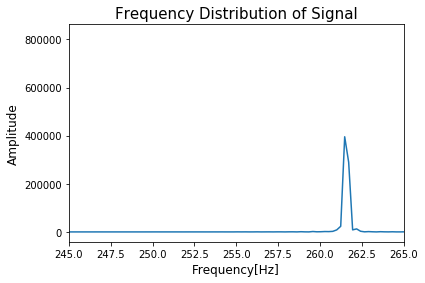

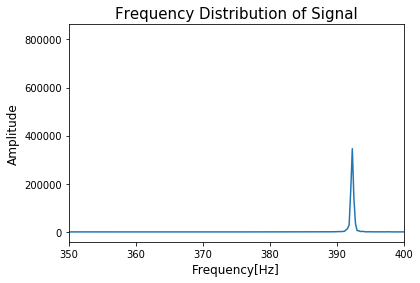

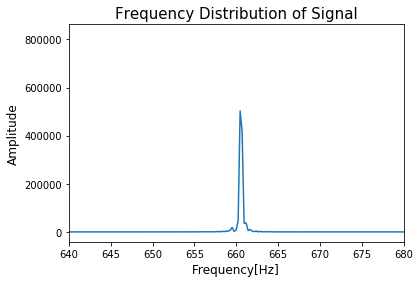

In [39]:
##We can also find the frequency peak that should correspond to the C note being played. 

freqlow = 245.  #range of frequencies I want to consider to find the peak frequency
freqhigh = 265.
indicelow = freqlow*n/adata[0]; indicehigh = freqhigh*n/adata[0]

plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.xlim(freqlow,freqhigh)



largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])

loudest_freq = freqAxis[largest_value_indice]
print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,sound_list_more[num],loudest_freq + freqlow))

##We can also find the frequency peak that should correspond to the G note being played. 

freqlow = 350.
freqhigh = 400.
indicelow = freqlow*n/adata[0]; indicehigh = freqhigh*n/adata[0]

plt.figure()
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)

plt.xlim(freqlow,freqhigh)



largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])

loudest_freq = freqAxis[largest_value_indice]
print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,sound_list_more[num],loudest_freq + freqlow))

##We can also find the frequency peak that should correspond to the 2nd harmonic of the E note.
freqlow = 640.
freqhigh = 680.
indicelow = freqlow*n/adata[0]; indicehigh = freqhigh*n/adata[0]

plt.figure()
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)

plt.xlim(freqlow,freqhigh)



largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])

loudest_freq = freqAxis[largest_value_indice]
print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,sound_list_more[num],loudest_freq + freqlow))


Nice. We see that the most prominant frequency in this range is at 261.625 Hz, corresponding to the C3 note that should be right at 261.626 Hz. And the frequency peak that corresponds to the G note was found to be at 392.511 Hz, where the exact frequency of G4 from the chart should be at 391.995 Hz. I was also able to find the 2nd harmonic of the E note being played at the frequency 660.662Hz. The precise frequency of this E5 note is 659.255 Hz. Pretty good results that can essentially be used to confirm that I am playing these guitar notes correctly and that the guitar is correctly tuned.

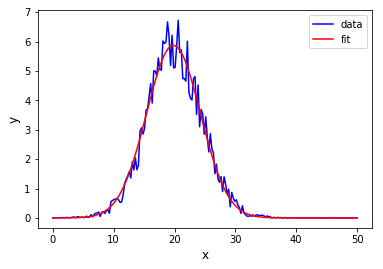

In [23]:
#Exploring different functions to fit a frequency distribution peak.

#Just confirming to myself that the optimize method works to fit a gaussian.

from scipy import optimize
from astropy import modeling

        
m = modeling.models.Gaussian1D(amplitude=5,mean=20,stddev=4)
x = np.linspace(0,50,200)
data = m(x)
data = data + np.sqrt(data) * np.random.random(len(x)) - 0.1  #adding some noise to data
data -= data.min()
plt.plot(x, data, color='blue', label ='data')
plt.xlabel('x',fontsize=12); plt.ylabel('y',fontsize=12)

def gaussian(x, amplitude, mean, stddev):
    """Gaussian fit function
    """
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

popt, popc = optimize.curve_fit(gaussian, x, data)         
plt.plot(x, gaussian(x, *popt), color='red', label='fit')
plt.legend()

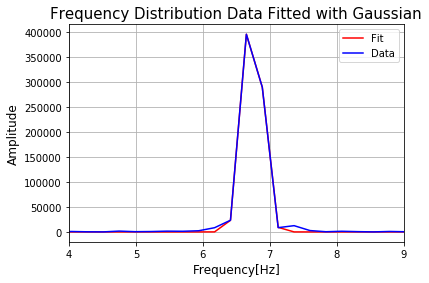

In [24]:
##Fitting the data above in the guitarchord sample to a gaussian curve to explore its fit

from scipy import optimize

freqlow = 255; freqhigh = 270
#indicelow = freqlow*n/adata[0]; indicehigh = freqhigh*n/adata[0]
xdata = np.array(freqAxis[int(indicelow):int(indicehigh)])
ydata = np.array(MagFreq[int(indicelow):int(indicehigh)])
xs = np.linspace(256,270,200)
xdata = xdata - xdata.min()

def gaussian_fit(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

popt,pcov = optimize.curve_fit(gaussian_fit, xdata, ydata)
plt.plot(xdata,gaussian_fit(xdata,*popt),color='red',label='Fit')
plt.plot(xdata, ydata, color='blue',label='Data')
plt.title('Frequency Distribution Data Fitted with Gaussian',fontsize=15)
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.xlim(4,9)
plt.grid()
plt.legend()

Interesting. I would expect not as precise as a fit as the peak is not exactly bell shaped but it seems like the fit pretty much fit exactly over the frequency peak. Unfortunately I could not seem to get the x axis correctly oriented with my data. This peak should be placed around 261 Hz but instead the gaussian fit places it around 6.6. We can still check out the gaussian fit parameters though.. However this type of fit over the frequency distribution is not really necessary unless used to find the best fit peak amplitude. Our data is discrete and therefore we can think of each frequency value as having one amplitude value, like a dirac delta funciton would. This would be the case if the audio sample was at constant amplitude and frequency over the entire time interval. However this is not exactly the case and therefore each frequency peak is of a slightly different form but overall shaped as something like a Gauss function converging to a Delta function.

In [25]:
#just looking at the parameters from the Gaussian fit. 
#the mean and stddev seem to be correct but the peak amplitude seems not to be the correct value 

names = ['amplitude','mean','stddev']
for i,name in zip(range(len(popt)),names):
    print('For parameter, %s, the value is %.3f +/- %.3f' %(name,popt[i],np.sqrt(pcov[i,i])))
    

For parameter, amplitude, the value is 509151.271 +/- 5569.801
For parameter, mean, the value is 6.745 +/- 0.001
For parameter, stddev, the value is 0.134 +/- 0.002


Sample length = 2.7200 seconds
loudest frequency in acousticguitarchord_Gmaj.wav is: 123.5284 Hz


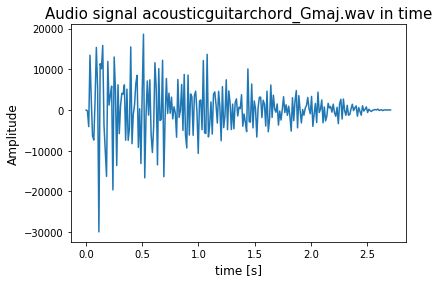

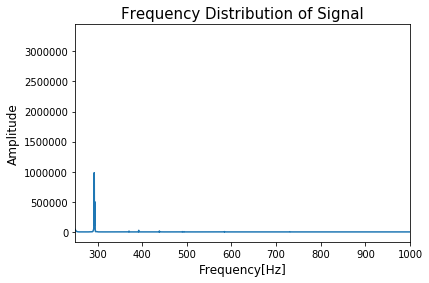

In [41]:
##Next sample, exploring the acoustic guitar chord sound

num = 3  #list indice of guitarchord sample in sound_list_more

adata = audiodata_processing(sound_list_more)
length = len(adata[1]) / adata[0]
print("Sample length = %.4f seconds" %length)


# Plot the audio signal in time
fig = plt.figure(1)
time = np.linspace(0., length, len(adata[1]))
plt.title('Audio signal %s in time' %(sound_list_more[num]),size=15)
#plt.xlim([0,1.5])
plt.xlabel('time [s]',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(time[::500], adata[1][::500])

n = len(adata[1])
adata2 = adata[2][0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(adata2)   #Magnitude
MagFreq = MagFreq / float(n)
#power spectrum
MagFreq = MagFreq**2

t = np.linspace(0,.1,500)
T = t[1] - t[0] #total sampling interval
N = len(adata[1])

    
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (adata[0] / n);

freqlow = 250
freqhigh = 1000

largest_value_indice = np.argmax(MagFreq)
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure(2)
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
#plt.scatter(freqAxis[int(loudest_freq*n / adata[0] )],MagFreq[int(loudest_freq*n / adata[0] )],alpha=.5,s=20,label='calculated peak frequency')
plt.xlim(freqlow,freqhigh)

print('loudest frequency in %s is: %.4f Hz' %(sound_list_more[num],loudest_freq))

loudest frequency between 100.0 Hz and 300.0 Hz in acousticguitarchord_Gmaj.wav is: 123.5292 Hz
loudest frequency between 130.0 Hz and 150.0 Hz in acousticguitarchord_Gmaj.wav is: 146.1763 Hz
loudest frequency between 180.0 Hz and 200.0 Hz in acousticguitarchord_Gmaj.wav is: 195.8087 Hz


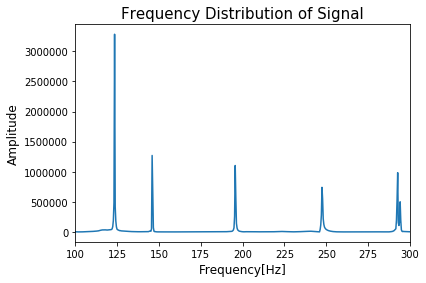

In [42]:
##We can find the frequency peaks that correspond to the notes being played. 

freqlow = 100.  #range of frequencies I want to consider to find the peak frequency
freqhigh = 300.
indicelow = freqlow*n/adata[0]; indicehigh = freqhigh*n/adata[0]

plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.xlim(freqlow,freqhigh)



largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])

loudest_freq = freqAxis[largest_value_indice]
print('loudest frequency between %.1f Hz and %.1f Hz in %s is: %.4f Hz' %(freqlow,freqhigh,sound_list_more[num],loudest_freq + freqlow))

#for the 2nd peak
freqlow = 130.  
freqhigh = 150.
largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]
print('loudest frequency between %.1f Hz and %.1f Hz in %s is: %.4f Hz' %(freqlow,freqhigh,sound_list_more[num],loudest_freq + freqlow))

#for the 3rd peak
freqlow = 180.  
freqhigh = 200.
largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]
print('loudest frequency between %.1f Hz and %.1f Hz in %s is: %.4f Hz' %(freqlow,freqhigh,sound_list_more[num],loudest_freq + freqlow))



We see that the most prominant frequency in the sample is the B2 note being played, which should have an exact frequency of 123.471 Hz. We can also spot the frequency peak corresponding to the G3 note at around 196 Hz, and the peak corresponding to the D3 note at 146 Hz. These computed fundamental frequencies match up nicely with the expected frequency values.

Overall we see that this method of decomposing the signal into its frequency components using FFT is very accurate in identifying the most prominant frequencies in the signal. The peaks are sharp enough such that I can use the method of identifying the largest amplitude value in the list to identify the peak of the distribution. This seems to work well enough to obtain accurate frequency peak results that are all around 2 Hz or less from the theoretical frequency value. However, most of the calcualted harmonic frequency values are very close to the theoretical values wether the audio signal was generated by my computer program or recorded live with a microphone. This is actually quite suprising as at first I expected slightly larger deviations from theoretical frequency values. But if the instruments are tuned and played correctly, it makes sense that the frequency peaks precicely match the expected values. 

Now I would like to check out the frequency spectra of a snippit of a song. The song is actually one that I made. It is just an instrumental, there are no lyrics. The song is in the key C# Major.  Lets see if we can recognize any of the notes in that key that are prominant in the song.

Sample length = 39.4400 seconds
loudest frequency in connectingsnippit_mono.wav is: 69.6754 Hz


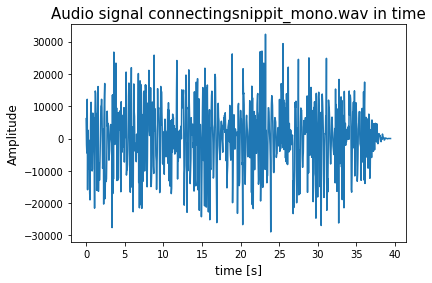

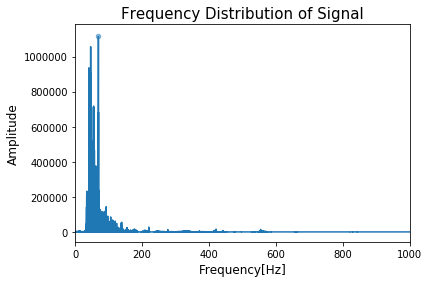

In [43]:
connecting_songsnip = 'connectingsnippit_mono.wav' 

song_list = []
song_list.append(connecting_songsnip)

##Exploring the acoustic guitar chord sample

num = 0  #list indice of guitarchord sample in sound_list_more

adata = audiodata_processing(song_list)
length = len(adata[1]) / adata[0]
print("Sample length = %.4f seconds" %length)


# Plot the audio signal in time
fig = plt.figure(1)
time = np.linspace(0., length, len(adata[1]))
plt.title('Audio signal %s in time' %(song_list[num]),size=15)
#plt.xlim([0,1.5])
plt.xlabel('time [s]',fontsize=12)
plt.ylabel('Amplitude',fontsize=12)
plt.plot(time[::2000], adata[1][::2000])  #plotting every 2000 points seems to give a signal that can be seen clearly

n = len(adata[1])
adata2 = adata[2][0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(adata2) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2

t = np.linspace(0,.1,500)
T = t[1] - t[0] #total sampling interval
N = len(adata[1])

    
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (adata[0] / n);

freqlow = 0
freqhigh = 1000

largest_value_indice = np.argmax(MagFreq)
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure(2)
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.scatter(freqAxis[int(loudest_freq*n / adata[0] )],MagFreq[int(loudest_freq*n / adata[0] )],alpha=.5,s=20,label='calculated peak frequency')
plt.xlim(freqlow,freqhigh)

print('loudest frequency in %s is: %.4f Hz' %(song_list[num],loudest_freq))


loudest frequency between 0.0 and 150.0 in connectingsnippit_mono.wav is: 69.6754 Hz
loudest frequency between 40.0 and 43.0 in connectingsnippit_mono.wav is: 41.5720 Hz
loudest frequency between 45.0 and 48.0 in connectingsnippit_mono.wav is: 46.5720 Hz
loudest frequency between 52.0 and 57.0 in connectingsnippit_mono.wav is: 55.4229 Hz


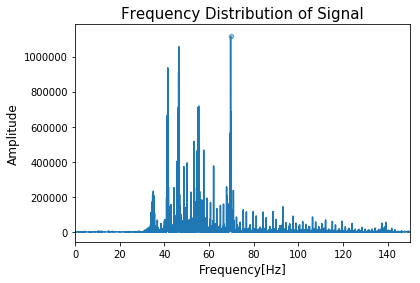

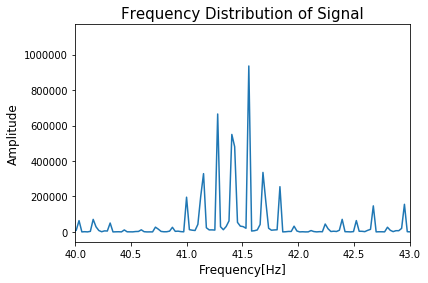

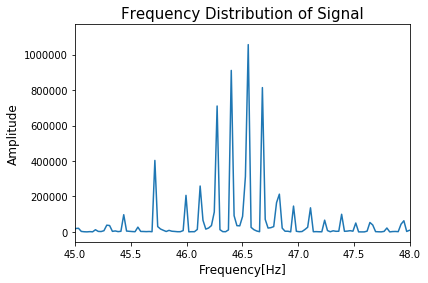

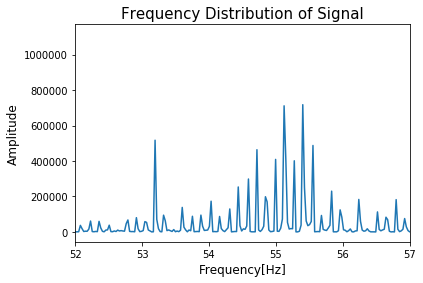

In [44]:
#Lets look in the frequency range 0 to 150

freqlow = 0
freqhigh = 150

largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.scatter(freqAxis[int(loudest_freq*n / adata[0] )],MagFreq[int(loudest_freq*n / adata[0] )],alpha=.5,s=20,label='calculated peak frequency')
plt.xlim(freqlow,freqhigh)

print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,song_list[num],loudest_freq + freqlow))

#Lets look in the frequency range 40 to 43 to find the peak there

freqlow = 40
freqhigh = 43

largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.xlim(freqlow,freqhigh)

print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,song_list[num],loudest_freq + freqlow))

#Lets look in the frequency range 45 to 48 to find the peak there

freqlow = 45
freqhigh = 48

largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.xlim(freqlow,freqhigh)

print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,song_list[num],loudest_freq + freqlow))



#Lets look in the frequency range 52 to 57 to find the peak there

freqlow = 52
freqhigh = 57

largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.xlim(freqlow,freqhigh)

print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,song_list[num],loudest_freq + freqlow))


loudest frequency between 200.0 and 300.0 in connectingsnippit_mono.wav is: 220.2840 Hz
loudest frequency between 260.0 and 300.0 in connectingsnippit_mono.wav is: 277.0892 Hz


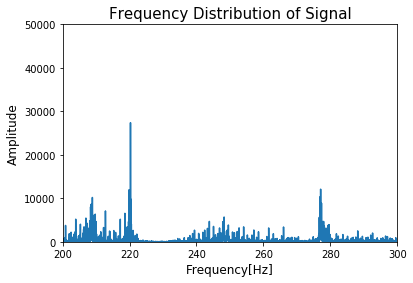

In [45]:
#Lets look in the slightly higher frequency range

freqlow = 200
freqhigh = 300

largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]

fig = plt.figure()
plt.ylabel('Amplitude',fontsize=12)
plt.xlabel('Frequency[Hz]',fontsize=12)
plt.title('Frequency Distribution of Signal',fontsize=15)
plt.plot(freqAxis, MagFreq) #Power spectrum
plt.xlim(freqlow,freqhigh)
plt.ylim(0,50000)

print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,song_list[num],loudest_freq + freqlow))

#Lets look even higher for the next peak

freqlow = 260
freqhigh = 300

largest_value_indice = np.argmax(MagFreq[int(freqlow*n / adata[0]):int(freqhigh*n / adata[0])])
loudest_freq = freqAxis[largest_value_indice]

print('loudest frequency between %.1f and %.1f in %s is: %.4f Hz' %(freqlow,freqhigh,song_list[num],loudest_freq + freqlow))




We found that the loudest frequency in the entire snippit of the song is at 69.67 Hz. The actual frequency of the C2# note is at 69.269 Hz. These two values are very close! This is a proper indicator that my song is in key C#. Nice! The other primary frequencies in the sample are at 41.57 Hz, 46.57 Hz, and 55.42 Hz. The notes which these frequencies are closest to are E1 at 41.20 Hz , F1# at 46.25 Hz, and A1 at 55.00 Hz. These are the correct bass notes of the three other chords played in my song, E Major, F# Minor, and A Major.

I am somewhat suprised to see how accurately these frequency peaks line up with the expected values for the notes I was playing in the song. This FFT method has correctly found the peak of the fundamental note in each of the four chords in the song. I would guess that this is due to the fact that the more dominant frequencies in this song are from the bass notes being played. These bass notes are in the lower end of the frequency spectrum and are more prominant than some of the higher frequencies. These four frequencies found are the exact bass notes that I played. The bass is always a good teller of what key the song is in, as explored here.

Looking in the higher frequency range, we find frequency peaks corresponding to the higher harmonics of the fundamental notes. The peak at 220.28 Hz corresponds to the A3 note at 220.00 Hz, and the peak at 277.09 Hz corresponds to the C#3 note at 277.18 Hz. These notes are played by other instruments such as the pad or piano in the song and are in a higher frequency range. This is great to see that the most prominant frequencies do correspond to the correct fundamental frequencies and their higher harmonics!

In [18]:
#The beginning of my attempt to create a map of every note to try and make a function that acts as a tuner 
#that could tell you what note you are playing and how far away from the correct frequency the note being played is.

C1 = 32.703; C2 = C1*2; C3 = C2*2; C4 = C3*2; C5 = C4*2; C6 = C5*2; C7 = C6*2; C8 = C7*2;
C1s = 34.648; C2s = C1s*2; C3s = C2s*2; C4s = C3s*2; C5s = C4s*2; C6s = C5s*2; C7s = C6s*2; C8s = C7s*2;
D1 = 36.708; D2 = D1*2; D3 = D2*2; D4 = D3*2; D5 = D4*2; D6 = D5*2; D7 = D6*2; D8 = D7*2;
D1s = 38.891; D2s = D1s*2; D3s = D2s*2; D4s = D3s*2; D5s = D4s*2; D6s = D5s*2; D7s = D6s*2; D8s = D7s*2;
E1 = 41.203; E2 = E1*2; E3 = E2*2; E4 = E3*2; E5 = E4*2; E6 = E5*2; E7 = E6*2; E8 = E7*2;
F1 = 43.654; F2 = F1*2; F3 = F2*2; F4 = F3*2; F5 = F4*2; F6 = F5*2; F7 = F6*2; F8 = F7*2;
F1s = 46.249; F2s = F1s*2; F3s = F2s*2; F4s = F3s*2; F5s = F4s*2; F6s = F5s*2; F7s = F6s*2; F8s = F7s*2;
G1 = 48.999; G2 = G1*2; G3 = G2*2; G4 = G3*2; G5 = G4*2; G6 = G5*2; G7 = G6*2; G8 = G7*2;
G1s = 51.913; G2s = G1s*2; G3s = G2s*2; G4s = G3s*2; G5s = G4s*2; G6s = G5s*2; G7s = G6s*2; G8s = G7s*2;
A1 = 55.000; A2 = A1*2; A3 = A2*2; A4 = A3*2; A5 = A4*2; A6 = A5*2; A7 = A6*2; A8 = A7*2;
A1s = 58.270; A2s = A1s*2; A3s = A2s*2; A4s = A3s*2; A5s = A4s*2; A6s = A5s*2; A7s = A6s*2; A8s = A7s*2;
B1 = 61.735; B2 = B1*2; B3 = B2*2; B4 = B3*2; B5 = B4*2; B6 = B5*2; B7 = B6*2; B8 = B7*2;



# Summary and Future Ideas

With this project I was able to map out and locate the fundamental frequencies and their harmonics in different sound samples that I played. The different harmonic overtones and their amplitudes play a role in the musical samples timbre and character; even if the piano and trumpet play the same note, both sound very different and this can be explored using Fourier transform analysis. The FFT package from Scipy is a great tool to do such a thing; break down these signals in time into their frequency components. I think this project successfully demonstrates the bascis of FFT processing on audio samples. However if I had more time I would love to dive even deeper into more types of audio processing, filtering, and manipulation. As stated above, I also think it would be cool to build a musical tuner tool. This might be acomplished with a computationally efficient series of for or while loops to essentially iterate through every possible frequency value that matches the sample's frequency peak value. The output would be the name of the note with the frequency that matches the best and how deviated the sample's frequency is. 

Overall I'm pretty happy with how this project turned out and I had a lot of fun recording, coding, and exploring these musical samples. 

Thanks Professor Ritz for a great quarter despite these challenging times!




References:

* [1] Landau, Rubin H.., et al. Computational Physics: Problem Solving with Python. 3rd ed., Wiley-VCH., 2015.
* [2] “Scipy.fftpack.fft.”   scipy.fftpack.fft   -   SciPy  v1.17   Manual, docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html.
* [3] Williams, Michael. “Scale Note Chart.” Mwguitars, 31 Mar. 2019, mwguitars.files.wordpress.com/.
* [4] Lapp, David R. “The Physics of Music and Musical Instruments.” Keller Physics. Tufts University, n.d. http://kellerphysics.com/acoustics/Lapp.pdf.

* [5] Sethares, William A. Tuning, Timbre, Spectrum, Scale. 2nd ed. London: Springer London Ltd, 2005.